# SVD

In [1]:
import pandas as pd

In [2]:
%pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 26.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp38-cp38-macosx_10_9_x86_64.whl size=758675 sha256=2b8113e3eb839c5e2cd4dd7797bf986e0ceb520b305d4397263d6d140f6f9eae
  Stored in directory: /Users/natburgwyn/Library/Caches/pip/wheels/20/91/57/2965d4cff1b8ac7ed1b6fa25741882af3974b54a31759e10b6
Successfully built scikit-surprise
Note: you may need to restart the kernel to use updated packages.


In [5]:
df = pd.read_csv('./REC_Collaborative_Facility.csv')

In [6]:
df.head()

,facilityid,user,rating
0,252494,99709,1
1,252494,99706,1
2,252494,99709,1
3,252494,99709,1
4,252494,84401,2


<AxesSubplot:>

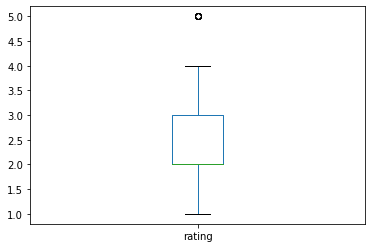

In [8]:
df.rating.plot.box()

In [9]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate

reader = Reader()
data = Dataset.load_from_df(df, reader)

algo = SVD()

cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

/Users/natburgwyn/opt/anaconda3/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 4.0.0-unsupported is an invalid version and will not be supported in a future release
  warnings.warn(


Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.7071  0.7073  0.7065  0.7070  0.0004  
MAE (testset)     0.6004  0.6004  0.5995  0.6001  0.0004  
Fit time          115.25  116.50  116.35  116.03  0.56    
Test time         10.17   10.12   9.17    9.82    0.46    


{'test_rmse': array([0.70708166, 0.70733603, 0.70648952]),
 'test_mae': array([0.60040672, 0.60037007, 0.59948313]),
 'fit_time': (115.24922966957092, 116.49686121940613, 116.34649586677551),
 'test_time': (10.174853086471558, 10.120771884918213, 9.165539026260376)}

In [56]:
from surprise.prediction_algorithms.predictions import Prediction

uid = str(20901)
iid = str(232507)

algo.predict(uid, iid)

Prediction(uid='20901', iid='232507', r_ui=None, est=5, details={'was_impossible': False})